<a href="https://colab.research.google.com/github/Anthonyyoyo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Anthony_GM_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [1]:
2 + 3

5

In [0]:
#I made this change

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

###LOADING DATA

In [6]:
# TODO - your code here

import pandas as pd
data_fl = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/initial_elos.csv')
print(data_fl.shape)
data_fl.head()

(123, 2)


,team,elo
0,RII,1503.947
1,STP,1300.000
2,BFF,1478.004
3,WBU,1300.000
4,RCH,1503.420


In [8]:
data_fl.columns

Index(['team', 'elo'], dtype='object')

In [58]:
data_fl.sort_values(by = ['elo'], ascending = True, na_position = 'first')[:12]

,team,elo
122,HOU,1300.0
84,PIT,1300.0
83,RED,1300.0
82,WSH,1300.0
81,CLI,1300.0
80,BKN,1300.0
116,CIN,1300.0
117,TB,1300.0
76,DWL,1300.0
74,BRL,1300.0


In [22]:

#READING FILES
#Step 1

!ls sample_data


anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [23]:
#Step 2

!wget https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/initial_elos.csv

--2019-08-07 08:38:58--  https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/initial_elos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415 (1.4K) [text/plain]
Saving to: ‘initial_elos.csv’

initial_elos.csv    100%[===================>]   1.38K  --.-KB/s    in 0s      

2019-08-07 08:38:58 (175 MB/s) - ‘initial_elos.csv’ saved [1415/1415]



In [24]:
!ls

initial_elos.csv  sample_data


In [27]:
data_fl2 = pd.read_csv('initial_elos.csv')
print(data_fl2.head())

  team       elo
0  RII  1503.947
1  STP  1300.000
2  BFF  1478.004
3  WBU  1300.000
4  RCH  1503.420


In [28]:
print(data_fl2.shape)

(123, 2)


In [29]:
data_fl2.nlargest(12, 'elo')

,team,elo
77,TOR,1505.000
61,TOL,1504.938
7,COL,1504.908
11,CBD,1504.688
51,MNN,1504.688
78,SIS,1504.298
0,RII,1503.947
4,RCH,1503.420
13,AKR,1503.420
50,CCL,1502.630


###BRIEF DATA ANALYSIS

In [0]:
import numpy as np

In [42]:
team_mean = np.mean(data_fl2)
print(team_mean)

elo             1342.140805
largest_team       0.121951
dtype: float64


In [0]:
data_fl2['largest_team'] = data_fl2['elo'] >= 1342



In [45]:
data_fl2[:25]

,team,elo,largest_team
0,RII,1503.947,True
1,STP,1300.000,False
2,BFF,1478.004,True
3,WBU,1300.000,False
4,RCH,1503.420,True
5,ABU,1300.000,False
6,DAY,1493.002,True
7,COL,1504.908,True
8,MUN,1478.004,True
9,CHI,1368.333,True


In [47]:

#Using a different mehod to get true or false
data_fl2['larger_team'] = np.where(data_fl2['elo'] > 1000, 'Yes', 'No')

data_fl2.head()

,team,elo,largest_team,larger_team
0,RII,1503.947,True,Yes
1,STP,1300.000,False,Yes
2,BFF,1478.004,True,Yes
3,WBU,1300.000,False,Yes
4,RCH,1503.420,True,Yes


In [71]:
data_fl2['team_size'] = np.where(data_fl2['elo'] < 1389, "Low",
                        np.where(data_fl2['elo'] <= 1439, "Medium",
                        np.where(data_fl2['elo'] > 1490, "High", "Moderate")))
print(data_fl2)

    team       elo  largest_team larger_team team_size
0    RII  1503.947          True         Yes      High
1    STP  1300.000         False         Yes       Low
2    BFF  1478.004          True         Yes  Moderate
3    WBU  1300.000         False         Yes       Low
4    RCH  1503.420          True         Yes      High
5    ABU  1300.000         False         Yes       Low
6    DAY  1493.002          True         Yes      High
7    COL  1504.908          True         Yes      High
8    MUN  1478.004          True         Yes  Moderate
9    CHI  1368.333          True         Yes       Low
10   MUT  1300.000         False         Yes       Low
11   CBD  1504.688          True         Yes      High
12   PTQ  1300.000         False         Yes       Low
13   AKR  1503.420          True         Yes      High
14   WHE  1300.000         False         Yes       Low
15   DHR  1499.667          True         Yes      High
16   CLP  1300.000         False         Yes       Low
17   CHT  

In [74]:
data_fl2.team_size.value_counts()

Low         95
High        15
Moderate     7
Medium       6
Name: team_size, dtype: int64

###PLOTTING THE DATA

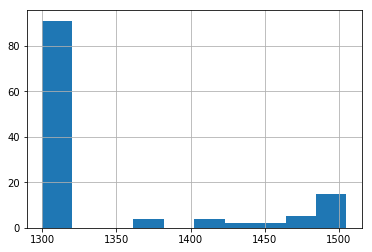

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot a hist
data_fl2.elo.hist(bins = 10)

**NEW: COUNTRIES DATA**

In [76]:
countries = pd.read_csv('https://raw.githubusercontent.com/Anthonyyoyo/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)

countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.